In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.graphics.tsaplots as sgt
from math import sqrt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv('GOOG1.csv')

In [3]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
raw_data.count()

Date         2698
Open         2698
High         2698
Low          2698
Close        2698
Adj Close    2698
Volume       2698
dtype: int64

In [5]:
data = raw_data.copy()

In [6]:
raw_data.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2698,2698.000000,2698.000000,2698.000000,2698.000000,2698.000000,2.698000e+03
unique,2698,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-09-25,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,753.438977,760.538327,746.482524,753.766168,753.766168,2.984240e+06
std,NaN,413.703739,418.784358,409.607559,414.434458,414.434458,2.464619e+06
min,NaN,218.336624,220.314209,216.005356,217.220810,217.220810,7.922000e+03
25%,NaN,384.512497,388.749130,381.415359,386.071670,386.071670,1.393150e+06
50%,NaN,661.035004,665.910004,653.825012,661.320007,661.320007,2.051460e+06
75%,NaN,1079.369965,1092.247467,1066.809967,1079.662445,1079.662445,4.030049e+06


In [7]:
del data['Open']
del data['High']
del data['Low']
del data['Adj Close']
del data['Volume']
data.head()

,Date,Close
0,2010-06-07,241.853470
1,2010-06-08,241.484848
2,2010-06-09,236.124939
3,2010-06-10,242.595688
4,2010-06-11,243.337906


In [8]:
data.set_index('Date', inplace=True)

In [9]:
data.head()

,Close
Date,
2010-06-07,241.853470
2010-06-08,241.484848
2010-06-09,236.124939
2010-06-10,242.595688
2010-06-11,243.337906


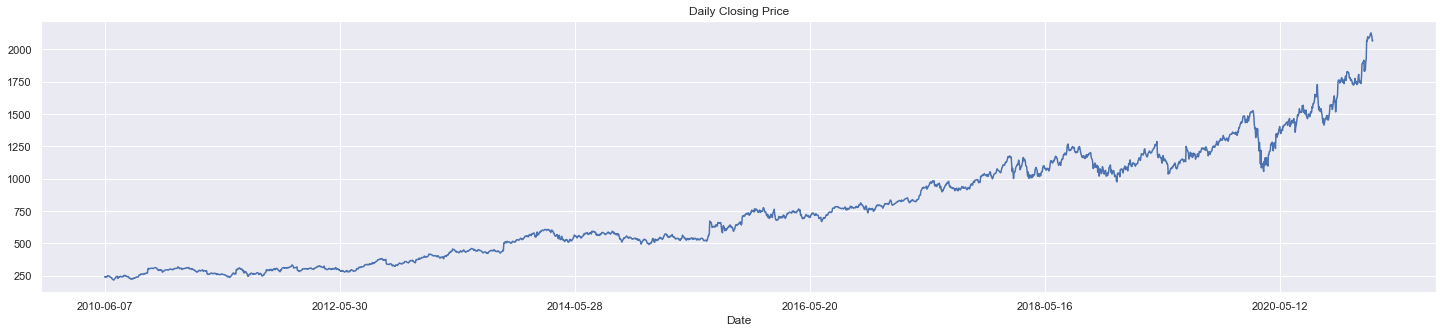

In [10]:
data.Close.plot(figsize=(25,5))
plt.title('Daily Closing Price')
plt.show()

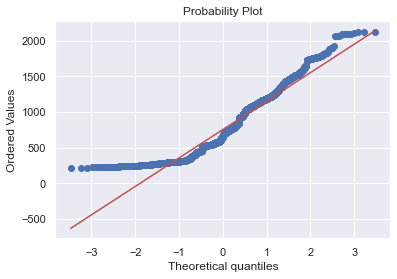

In [11]:
import scipy.stats
import pylab
scipy.stats.probplot(data['Close'], plot=pylab)
pylab.show()

In [12]:
data.isnull().sum()

Close    0
dtype: int64

In [13]:
#Splitting Data into train and test
size = int(len(data)*0.8)
df, df_test = data[:size], data[size:]

In [14]:
df.count()

Close    2158
dtype: int64

In [15]:
df_test.count()

Close    540
dtype: int64

In [16]:
sts.adfuller(data.Close)

(1.9480750584933648,
 0.9986015587537376,
 26,
 2671,
 {'1%': -3.4328006161256743,
  '5%': -2.862622699657979,
  '10%': -2.567346357793352},
 21939.93331238452)

In [17]:
sts.adfuller(df.Close)

(-0.33375920048535584,
 0.9205850630814509,
 24,
 2133,
 {'1%': -3.433419473570619,
  '5%': -2.862895974588963,
  '10%': -2.5674918550982277},
 15743.138481920383)

In [18]:
#Filtering Warnings
import warnings
warnings.filterwarnings('ignore')

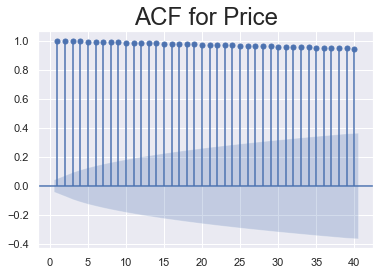

In [19]:
sgt.plot_acf(df.Close, zero=False, lags=40)
plt.title('ACF for Price', Size=24)
plt.show()

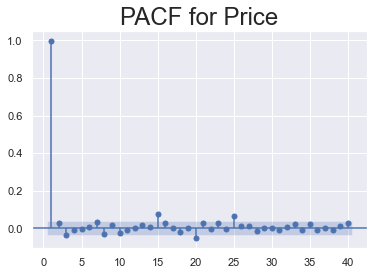

In [20]:
sgt.plot_pacf(data.Close, zero=False, lags=40)
plt.title('PACF for Price', Size=24)
plt.show()

In [21]:
#Model
#ARMA(1,1)
model_ar_1_ma_1 = ARMA(df.Close, order=(1,1))
results_ar_1_ma_1 = model_ar_1_ma_1.fit()
print(results_ar_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 2158
Model:                     ARMA(1, 1)   Log Likelihood               -7980.223
Method:                       css-mle   S.D. of innovations              9.751
Date:                Tue, 03 Jan 2023   AIC                          15968.447
Time:                        18:11:34   BIC                          15991.154
Sample:                             0   HQIC                         15976.753
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         629.0255    289.654      2.172      0.030      61.315    1196.736
ar.L1.Close     0.9996      0.000   2148.755      0.000       0.999       1.000
ma.L1.Close     0.0268      0.023      1.190    

In [22]:
df['results_ar_1_ma_1'] = results_ar_1_ma_1.resid

In [23]:
sts.adfuller(df.results_ar_1_ma_1)

(-10.3111353691941,
 3.1832296975581974e-18,
 23,
 2134,
 {'1%': -3.433418033468612,
  '5%': -2.862895338734693,
  '10%': -2.567491516545175},
 15741.116124595212)

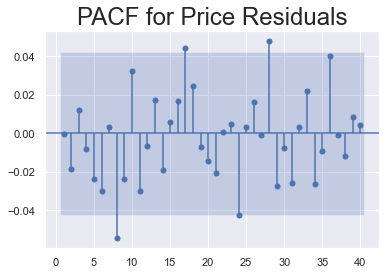

In [24]:
sgt.plot_pacf(df.results_ar_1_ma_1, zero=False, lags=40)
plt.title('PACF for Price Residuals', Size=24)
plt.show()

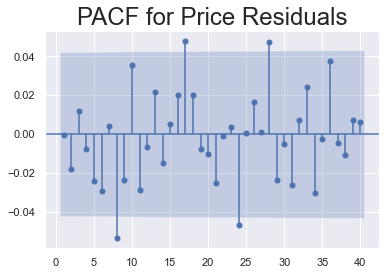

In [25]:
sgt.plot_acf(df.results_ar_1_ma_1, zero=False, lags=40)
plt.title('PACF for Price Residuals', Size=24)
plt.show()

In [26]:
#Model
#ARMA(8,8)
model_ar_8_ma_8 = ARMA(df.Close, order=(8,8))
results_ar_8_ma_8 = model_ar_8_ma_8.fit()
print(results_ar_8_ma_8.summary())

In [ ]:
#Model
#ARMA(8,7)
model_ar_8_ma_7 = ARMA(df.Close, order=(8,7))
results_ar_8_ma_7 = model_ar_8_ma_7.fit()
print(results_ar_8_ma_7.summary())

In [ ]:
#Model
#ARMA(8,6)
model_ar_8_ma_6 = ARMA(df.Close, order=(8,6))
results_ar_8_ma_6 = model_ar_8_ma_6.fit()
print(results_ar_8_ma_6.summary())

In [ ]:
#Chosen Models
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(8,8): \tLLR = ', results_ar_8_ma_8.llf, '\tAIC = ', results_ar_8_ma_8.aic)
print('\tARMA(8,7): \tLLR = ', results_ar_8_ma_7.llf, '\tAIC = ', results_ar_8_ma_7.aic)

### Using Return

In [ ]:
df['returns'] = df.Close.pct_change(1) * 100

In [ ]:
df

In [ ]:
df.returns[1:].plot(figsize=(20,5))
plt.title('Returns')
plt.show()

In [ ]:
sts.adfuller(df.returns[1:])

In [ ]:
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF For Returns', size=20)
plt.show()

In [ ]:
sgt.plot_pacf(df.returns[1:], zero=False, lags=40)
plt.title('PACF For Returns', size=20)
plt.show()

In [ ]:
#Model
#ARMA(1,1)
model_ret_ar_1_ma_1 = ARMA(df.Close, order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
print(results_ret_ar_1_ma_1.summary())

In [ ]:
df['results_ret_ar_1_ma_1'] = results_ret_ar_1_ma_1.resid

In [ ]:
df.results_ret_ar_1_ma_1[1:].plot(figsize=(20,5))
plt.title('Residual For Return2 ARMA(1,1)', size=18)
plt.show()

In [ ]:
sts.adfuller(df.results_ret_ar_1_ma_1[1:])

In [ ]:
sgt.plot_acf(df.results_ret_ar_1_ma_1[1:], zero=False, lags=40)
plt.title('ACF for df.results_ret_ar_1_ma_1', size=18)
plt.show()

In [ ]:
#(5,5)
#Model
#ARMA(5,5)
model_ret_ar_5_ma_5 = ARMA(df.Close, order=(5,5))
results_ret_ar_5_ma_5 = model_ret_ar_5_ma_5.fit()
print(results_ret_ar_5_ma_5.summary())

In [ ]:
#(5,5)
#Model
#ARMA(5,4)
model_ret_ar_5_ma_4 = ARMA(df.Close, order=(5,4))
results_ret_ar_5_ma_4 = model_ret_ar_5_ma_4.fit()
print(results_ret_ar_5_ma_4.summary())

In [ ]:
#Chosing the best Algorithm using LLR and AIC
#ARMA(3,4)
print('\tARMA(5,5): \tLLR = ', results_ret_ar_5_ma_5.llf, '\tAIC = ', results_ret_ar_5_ma_5.aic)
print('\tARMA(5,4): \tLLR = ', results_ret_ar_5_ma_4.llf, '\tAIC = ', results_ret_ar_5_ma_4.aic)

In [ ]:
#(5,5)
#Model
#ARMA(4,4)
model_ret_ar_4_ma_4 = ARMA(df.Close, order=(4,4))
results_ret_ar_4_ma_4 = model_ret_ar_4_ma_4.fit()
print(results_ret_ar_4_ma_4.summary())

In [ ]:
#(5,5)
#Model
#ARMA(3,3)
model_ret_ar_3_ma_3 = ARMA(df.Close, order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
print(results_ret_ar_3_ma_3.summary())

In [ ]:
#(5,5)
#Model
#ARMA(4,5)
model_ret_ar_4_ma_5 = ARMA(df.Close, order=(4,5))
results_ret_ar_4_ma_5 = model_ret_ar_4_ma_5.fit()
print(results_ret_ar_4_ma_5.summary())